# Object classification.

## In this examples, we will used pretrained models and keras. So not training will be performed at all. 

## This code should run fine in any computer with a decent CPU, no need for a GPU at all.

In [25]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.applications.vgg16 import decode_predictions as vgg16_decode_predictions


from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.vgg19 import decode_predictions as vgg19_decode_predictions


from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.applications.resnet50 import decode_predictions as resnet50_decode_predictions

import pandas as pd
from IPython.display import Image

%matplotlib inline

### Now, time to get our model, in this case we will play with VGG16, later we will use other models. 

### Notice that we will need to get the weights from the internet... and that might take a bit. Fortunately we only have to do this once per model

In [3]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

model = VGG16(weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

### Lets inspect our model a bit more...

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

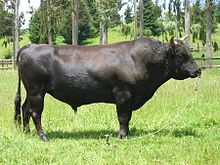

bison (76.79%)


In [7]:
image = load_img('bull.jpg', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
display(Image(filename = "bull.jpg", width=IMAGE_HEIGHT, height=IMAGE_WIDTH))
image = img_to_array(image)
image = image.reshape((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
image = vgg16_preprocess_input(image)
prediction = model.predict(image)
label = vgg16_decode_predictions(prediction)
label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))

In [11]:
predictions = pd.DataFrame(vgg16_decode_predictions(prediction)[0], columns=["_", "label", "prob"])
predictions = predictions.sort_values(by="prob")
predictions.set_index(predictions['label'], inplace=True)
del predictions["label"]
del predictions["_"]
predictions

,prob
label,
plow,0.000182
oxcart,0.000651
ox,0.065435
water_buffalo,0.165674
bison,0.767933


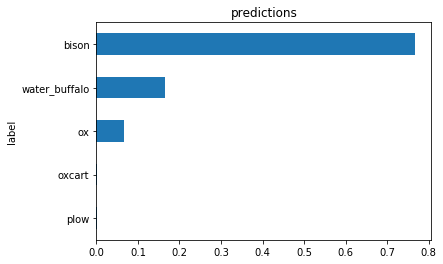

In [12]:
predictions.plot(kind='barh', title="predictions", legend=False)

### Lets put it all together...

In [13]:
def predict_image(image_file, concrete_model, preprocess_input, decode_predictions):
    loaded_image = load_img(image_file, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
    display(Image(filename = image_file, width=IMAGE_HEIGHT, height=IMAGE_WIDTH))
    loaded_image = img_to_array(loaded_image)
    loaded_image = loaded_image.reshape((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    loaded_image = preprocess_input(loaded_image)
    prediction = concrete_model.predict(loaded_image)
    label = decode_predictions(prediction)
    label = label[0][0]

    print('%s (%.2f%%)' % (label[1], label[2]*100))
    predictions = pd.DataFrame(decode_predictions(prediction)[0], columns=["_", "label", "prob"])
    predictions = predictions.sort_values(by="prob")
    predictions.set_index(predictions['label'], inplace=True)
    del predictions["label"]
    del predictions["_"]
    predictions
    predictions.plot(kind='barh', title="predictions", legend=False)
    

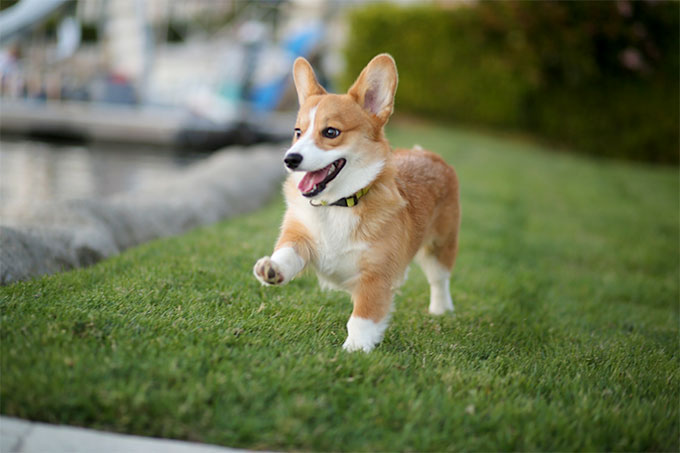

Pembroke (69.30%)


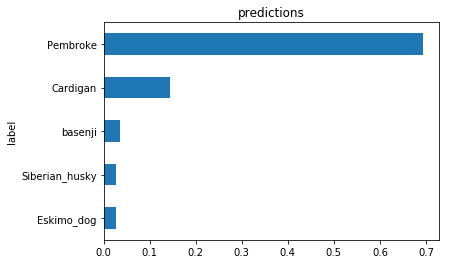

In [14]:
predict_image("dog.jpg", 
              model, 
              vgg16_preprocess_input, 
              vgg16_decode_predictions)

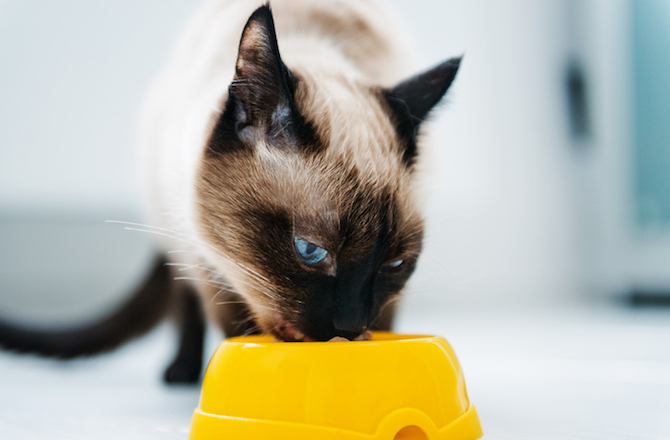

Siamese_cat (62.91%)


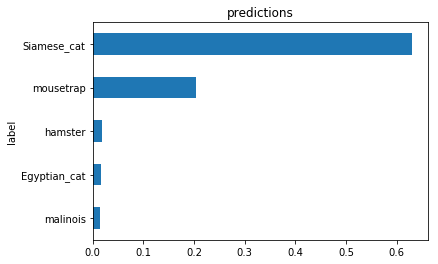

In [15]:
predict_image("cat.jpg", 
              model, 
              vgg16_preprocess_input, 
              vgg16_decode_predictions)

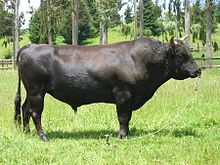

bison (76.79%)


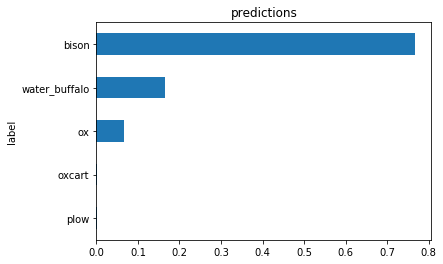

In [16]:
predict_image("bull.jpg", 
              model, 
              vgg16_preprocess_input, 
              vgg16_decode_predictions)

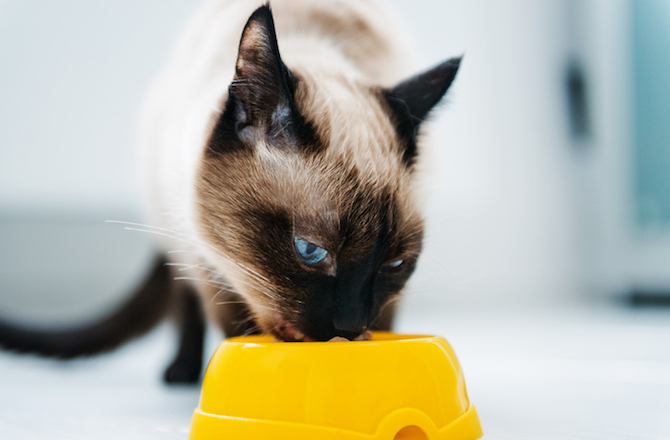

Siamese_cat (62.91%)


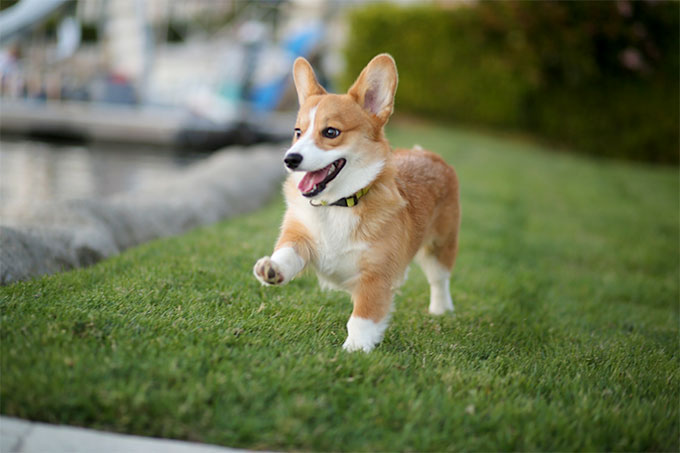

Pembroke (69.30%)


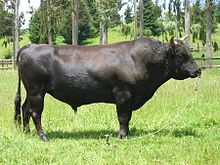

bison (76.79%)


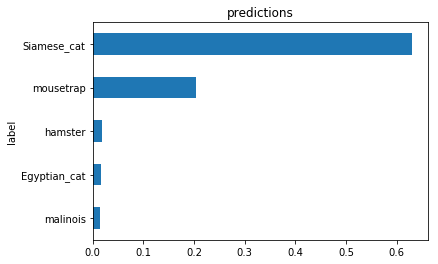

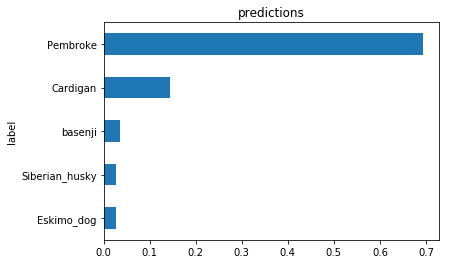

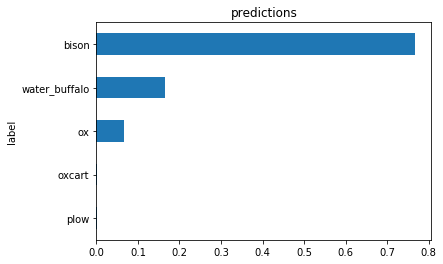

In [18]:
for name in ["cat.jpg", "dog.jpg", "bull.jpg"]:
    predict_image(name, 
              model, 
              vgg16_preprocess_input, 
              vgg16_decode_predictions)

In [19]:
modelVGG19 = VGG19(weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

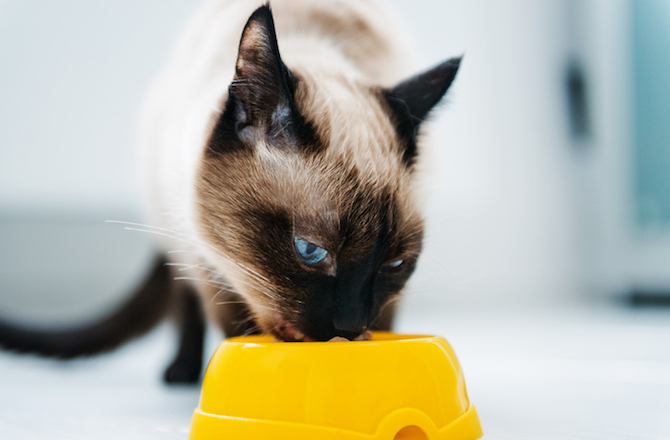

mousetrap (65.36%)


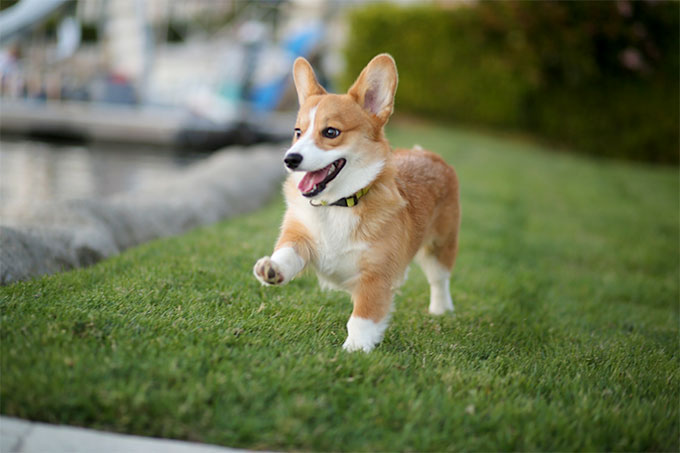

Pembroke (89.60%)


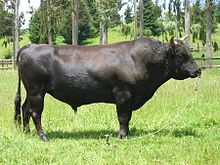

water_buffalo (41.36%)


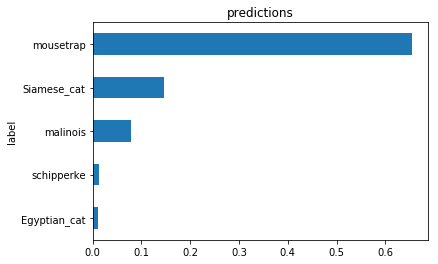

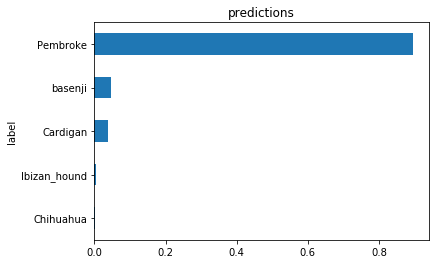

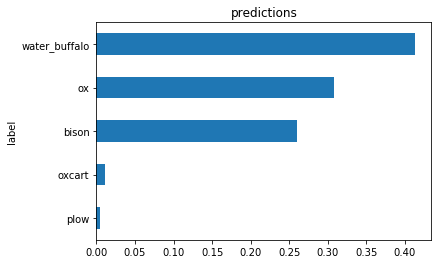

In [20]:
for name in ["cat.jpg", "dog.jpg", "bull.jpg"]:
    predict_image(name, 
              modelVGG19, 
              vgg19_preprocess_input, 
              vgg19_decode_predictions)

In [22]:
modelResNet50 = ResNet50(weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

102858752/102853048 [==============================] - 337s 3us/step


In [23]:
modelResNet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

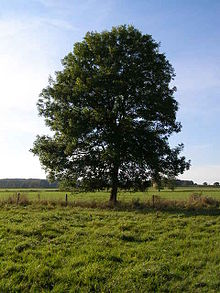

flagpole (18.83%)


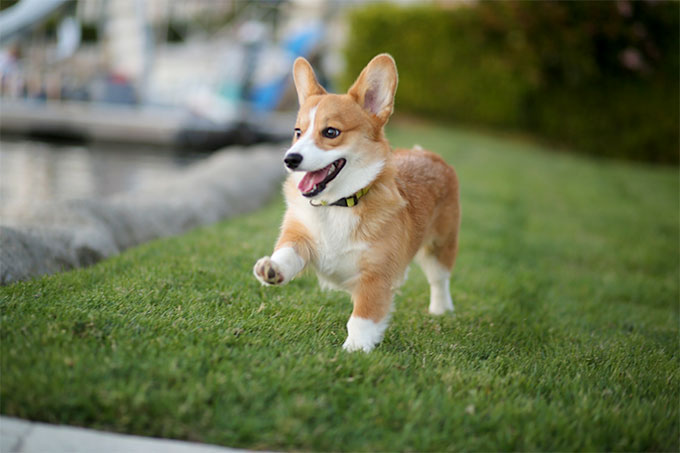

Pembroke (87.18%)


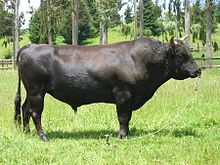

ox (59.55%)


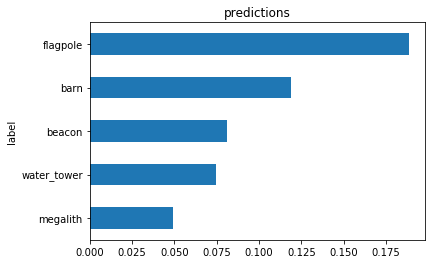

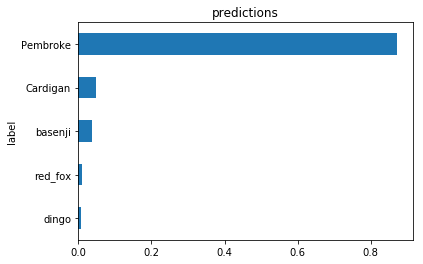

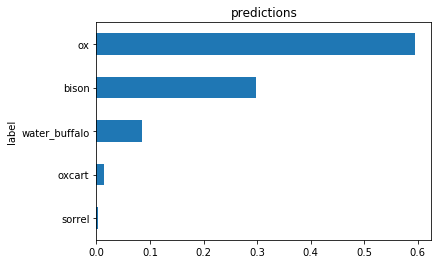

In [31]:
for name in ["tree.jpg", "dog.jpg", "bull.jpg"]:
    predict_image(name, 
              modelResNet50, 
              resnet50_preprocess_input, 
              resnet50_decode_predictions)